In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set(rc={'figure.figsize':(5,3)})

In [2]:
# load the dataset
df = pd.read_csv('current_infant_brand_clean.csv')
df

,cur_brand,first_buy_brand,babyage,ZONE,enroll_type2,enroll_age,open_rate0,click_rate0,redem_rate0,breastfed,breastfed_and_formula,formula,neither
0,0,0,120,1,1,-247,0.000000,0.000000,0.000000,1,0,0,0
1,1,1,150,1,1,-169,0.052632,0.000000,0.600000,0,0,1,0
2,0,0,330,1,1,-64,0.714286,0.285714,0.000000,0,1,0,0
3,1,1,60,1,0,-31,0.911765,0.205882,0.666667,0,1,0,0
4,1,1,30,1,1,9,0.250000,0.071429,0.250000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12888,1,0,180,0,1,-39,0.289474,0.105263,0.000000,0,1,0,0
12889,1,1,0,1,0,-241,0.782609,0.043478,0.500000,0,0,1,0
12890,1,0,30,1,1,-128,0.271186,0.050847,0.500000,0,1,0,0
12891,1,1,30,1,1,-37,0.210526,0.078947,0.000000,0,1,0,0


## 1. Histogram

### 1.1 Dependent variable: current brand

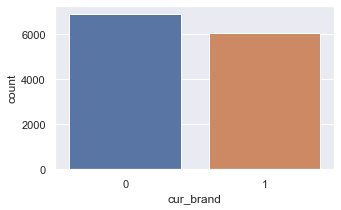

In [3]:
ax = sns.countplot(x="cur_brand", data=df)

* Will upsample the "1" category later.

### 1.2 Independent variables

<AxesSubplot:xlabel='ZONE', ylabel='count'>

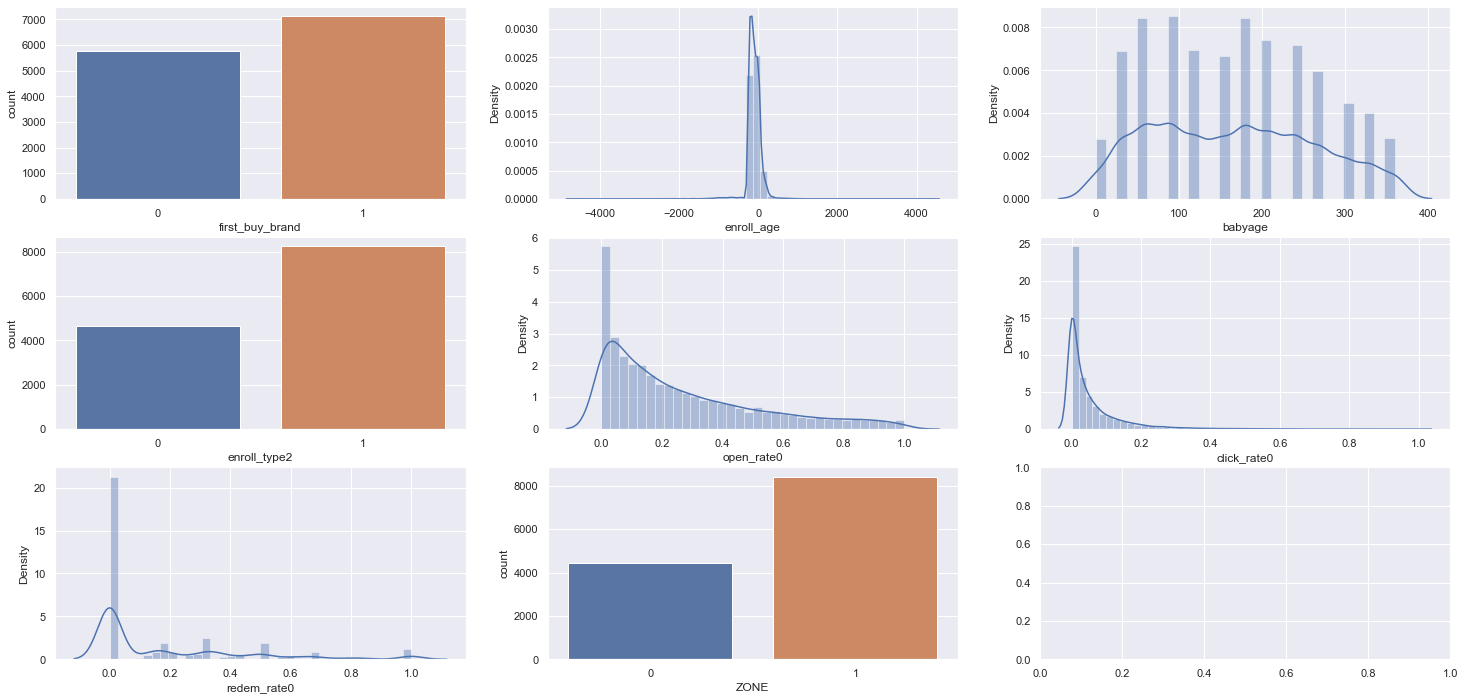

In [4]:
sns.set(rc={'figure.figsize':(25,12)})
fig, axs = plt.subplots(nrows=3, ncols=3)
sns.countplot(x="first_buy_brand", data=df , ax=axs[0,0])
sns.distplot(df["enroll_age"], ax=axs[0,1])
sns.distplot(df["babyage"], ax=axs[0,2])
sns.countplot(x="enroll_type2", data=df, ax=axs[1,0])
sns.distplot(df["open_rate0"], ax=axs[1,1])
sns.distplot(df["click_rate0"],  ax=axs[1,2])
sns.distplot(df["redem_rate0"],  ax=axs[2,0])
sns.countplot(x="ZONE", data=df, ax=axs[2,1])

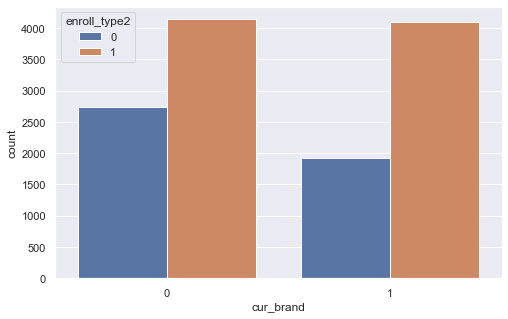

In [5]:
# current brand vs enrollment type
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.countplot(x="cur_brand", hue='enroll_type2', data=df)

* Based on the enrollment type distribution plot, we can see that the proportion of "0" (co-registered) is lower in the customer group that uses our brand. This fact could indicate the enrollment type is possibly crucial in forecasting the parent's current brand choice.

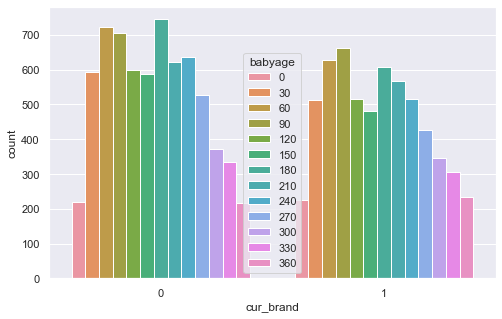

In [6]:
# current brand vs baby age
ax = sns.countplot(x="cur_brand", hue='babyage', data=df)

* The above graph demonstrates a similar distribution in terms of baby age within two categories, which could mean that this feature is less critical in the predictive model.

<AxesSubplot:xlabel='cur_brand', ylabel='open_rate0'>

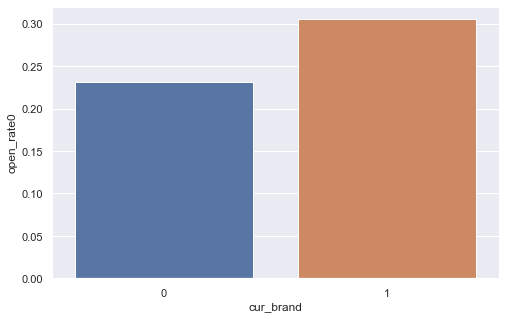

In [7]:
# current brand vs email open rate
df2 = pd.pivot_table(df,index='cur_brand', values='open_rate0', aggfunc='mean')
sns.barplot(x=df2.index, y="open_rate0", data=df2)

* Taking the average email open rate in two groups, we can observe a significant gap. This aligns with the business logic, since customers who are more engaged with our email campaign will be more likely to choose our brand.

## 2. Boxplot

<AxesSubplot:>

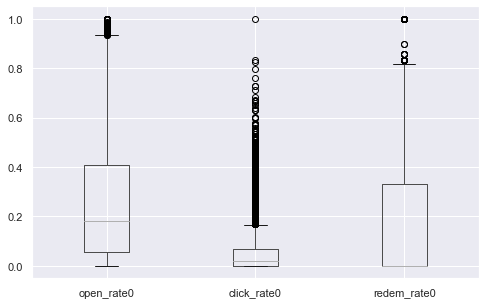

In [8]:
sns.set(rc={'figure.figsize':(8,5)})
df.boxplot(column = ["open_rate0","click_rate0","redem_rate0"])

<AxesSubplot:>

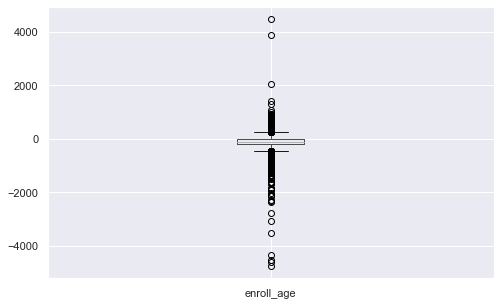

In [9]:
df.boxplot(column = ["enroll_age"])

<AxesSubplot:>

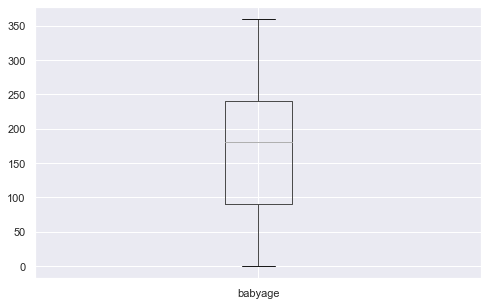

In [10]:
df.boxplot(column = ["babyage"])

## 3. Correlation

In [11]:
df[['cur_brand','first_buy_brand','enroll_age','babyage','enroll_type2','open_rate0','click_rate0', 'redem_rate0', 'ZONE']].corr()

,cur_brand,first_buy_brand,enroll_age,babyage,enroll_type2,open_rate0,click_rate0,redem_rate0,ZONE
cur_brand,1.000000,0.592818,0.083787,0.000327,0.082911,0.143958,0.177334,0.171448,0.149327
first_buy_brand,0.592818,1.000000,0.063070,0.019567,0.058435,0.102573,0.137190,0.168085,0.246017
enroll_age,0.083787,0.063070,1.000000,0.104898,0.051759,0.027118,0.020435,0.031215,-0.005288
babyage,0.000327,0.019567,0.104898,1.000000,-0.000078,-0.095385,-0.097174,-0.015392,0.021207
enroll_type2,0.082911,0.058435,0.051759,-0.000078,1.000000,0.011803,0.007450,0.104437,-0.050139
open_rate0,0.143958,0.102573,0.027118,-0.095385,0.011803,1.000000,0.654657,0.218787,0.025329
click_rate0,0.177334,0.137190,0.020435,-0.097174,0.007450,0.654657,1.000000,0.210126,0.027649
redem_rate0,0.171448,0.168085,0.031215,-0.015392,0.104437,0.218787,0.210126,1.000000,0.063815
ZONE,0.149327,0.246017,-0.005288,0.021207,-0.050139,0.025329,0.027649,0.063815,1.000000


<AxesSubplot:>

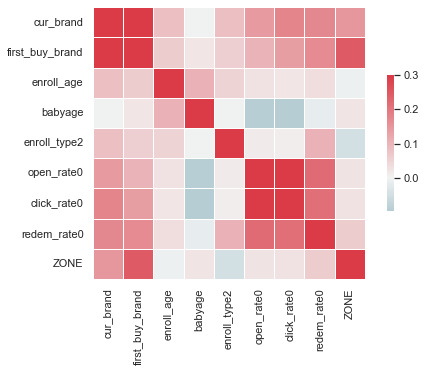

In [12]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['cur_brand','first_buy_brand','enroll_age','babyage','enroll_type2','open_rate0','click_rate0', 'redem_rate0', 'ZONE']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

* Due to the high correlation between "cur_brand" and "first_buy_brand", it is reasonable to drop the "first_buy_brand" from the independent variables matrix X in the modeling session.

## 4. Pivot Tables

In [13]:
# first brand vs current brand 
pd.pivot_table(df, index = 'first_buy_brand', values = 'cur_brand', aggfunc='count')

,cur_brand
first_buy_brand,
0,5764
1,7129


In [14]:
# enrollment type vs current brand
pd.pivot_table(df, index = 'enroll_type2', values = 'cur_brand', aggfunc='count')

,cur_brand
enroll_type2,
0,4655
1,8238


In [15]:
# hospital zone vs current brand
pd.pivot_table(df, index = 'ZONE', values = 'cur_brand', aggfunc='count')

,cur_brand
ZONE,
0,4464
1,8429
